# Lab 3.2: Biological Datasets and EM Algorithm for Gaussian Mixture Models

## Name: Your Name Here (Your netid here)

### Due: Wednesday, April 17th , 2019 at 11:59 PM

**Logistics and Lab Submission**

See the [course website](https://courses.engr.illinois.edu/ece365/sp2019/labsHernaez.html). Submit your completed Jupyter notebook (name it netid.ipynb) on Compass. If your code depends on any files not provided for the lab, then also upload those (in netid.zip file). Be sure to fill in your name + netid at the top of the lab. **Do not submit the data sets!**

**What You Will Need To Know For This Lab**

This lab covers the topics:
- Bioconductor tools for accessing genome sequence and annotations 
- Formulation of Expectation Maximization Algorithm for Gaussian Mixture Models

There are some problems that have short answer questions. <b>Do not write an essay -- a few (1-2) complete sentences will suffice.</b>

### Package installations
The following packages will need to be installed for this lab. These should install only the first time you run this cell and not in future runs.

In [1]:
# install missing packages from CRAN
new_cran_packages <- c("mixtools", "mclust")
existing_packages <- installed.packages()[,"Package"]
missing_packages <- new_cran_packages[!(new_cran_packages %in% existing_packages)]
if(length(missing_packages)){
    install.packages(missing_packages)
}

# install missing packages from Bioconductor
new_bioc_packages <- c("BSgenome", "BSgenome.Hsapiens.NCBI.GRCh38", "biomaRt", 
                       "GenomicFeatures", "ggbio")
existing_packages <- installed.packages()[,"Package"]
missing_packages <- new_bioc_packages[!(new_bioc_packages %in% existing_packages)]
if(length(missing_packages)){
    source("http://www.bioconductor.org/biocLite.R")
    biocLite(missing_packages)
}

### Problem 1: Accessing Genome Information with Bioconductor (25 points)

We will start by using the `BSgenome` package to load a recent version of the human genome into R as `BioStrings` objects.

First, we check which genomes are available. 

In [2]:
library(BSgenome)
available.genomes()

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: s

[1] "BSgenome.Alyrata.JGI.v1"                  
 [2] "BSgenome.Amellifera.BeeBase.assembly4"    
 [3] "BSgenome.Amellifera.UCSC.apiMel2"         
 [4] "BSgenome.Amellifera.UCSC.apiMel2.masked"  
 [5] "BSgenome.Athaliana.TAIR.04232008"         
 [6] "BSgenome.Athaliana.TAIR.TAIR9"            
 [7] "BSgenome.Btaurus.UCSC.bosTau3"            
 [8] "BSgenome.Btaurus.UCSC.bosTau3.masked"     
 [9] "BSgenome.Btaurus.UCSC.bosTau4"            
[10] "BSgenome.Btaurus.UCSC.bosTau4.masked"     
[11] "BSgenome.Btaurus.UCSC.bosTau6"            
[12] "BSgenome.Btaurus.UCSC.bosTau6.masked"     
[13] "BSgenome.Btaurus.UCSC.bosTau8"            
[14] "BSgenome.Celegans.UCSC.ce10"              
[15] "BSgenome.Celegans.UCSC.ce11"              
[16] "BSgenome.Celegans.UCSC.ce2"               
[17] "BSgenome.Celegans.UCSC.ce6"               
[18] "BSgenome.Cfamiliaris.UCSC.canFam2"        
[19] "BSgenome.Cfamiliaris.UCSC.canFam2.masked" 
[20] "BSgenome.Cfamiliaris.UCSC.canFam3"        
[21] "BSgenome.Cfamiliaris.UCSC.canFam3.masked" 
[22] "BSgenome.Dmelanogaster.UCSC.dm2"          
[23] "BSgenome.Dmelanogaster.UCSC.dm2.masked"   
[24] "BSgenome.Dmelanogaster.UCSC.dm3"          
[25] "BSgenome.Dmelanogaster.UCSC.dm3.masked"   
[26] "BSgenome.Dmelanogaster.UCSC.dm6"          
[27] "BSgenome.Drerio.UCSC.danRer10"            
[28] "BSgenome.Drerio.UCSC.danRer5"             
[29] "BSgenome.Drerio.UCSC.danRer5.masked"      
[30] "BSgenome.Drerio.UCSC.danRer6"             
[31] "BSgenome.Drerio.UCSC.danRer6.masked"      
[32] "BSgenome.Drerio.UCSC.danRer7"             
[33] "BSgenome.Drerio.UCSC.danRer7.masked"      
[34] "BSgenome.Ecoli.NCBI.20080805"             
[35] "BSgenome.Gaculeatus.UCSC.gasAcu1"         
[36] "BSgenome.Gaculeatus.UCSC.gasAcu1.masked"  
[37] "BSgenome.Ggallus.UCSC.galGal3"            
[38] "BSgenome.Ggallus.UCSC.galGal3.masked"     
[39] "BSgenome.Ggallus.UCSC.galGal4"            
[40] "BSgenome.Ggallus.UCSC.galGal4.masked"     
[41] "BSgenome.Ggallus.UCSC.galGal5"            
[42] "BSgenome.Hsapiens.1000genomes.hs37d5"     
[43] "BSgenome.Hsapiens.NCBI.GRCh38"            
[44] "BSgenome.Hsapiens.UCSC.hg17"              
[45] "BSgenome.Hsapiens.UCSC.hg17.masked"       
[46] "BSgenome.Hsapiens.UCSC.hg18"              
[47] "BSgenome.Hsapiens.UCSC.hg18.masked"       
[48] "BSgenome.Hsapiens.UCSC.hg19"              
[49] "BSgenome.Hsapiens.UCSC.hg19.masked"       
[50] "BSgenome.Hsapiens.UCSC.hg38"              
[51] "BSgenome.Hsapiens.UCSC.hg38.masked"       
[52] "BSgenome.Mfascicularis.NCBI.5.0"          
[53] "BSgenome.Mfuro.UCSC.musFur1"              
[54] "BSgenome.Mmulatta.UCSC.rheMac2"           
[55] "BSgenome.Mmulatta.UCSC.rheMac2.masked"    
[56] "BSgenome.Mmulatta.UCSC.rheMac3"           
[57] "BSgenome.Mmulatta.UCSC.rheMac3.masked"    
[58] "BSgenome.Mmulatta.UCSC.rheMac8"           
[59] "BSgenome.Mmusculus.UCSC.mm10"             
[60] "BSgenome.Mmusculus.UCSC.mm10.masked"      
[61] "BSgenome.Mmusculus.UCSC.mm8"              
[62] "BSgenome.Mmusculus.UCSC.mm8.masked"       
[63] "BSgenome.Mmusculus.UCSC.mm9"              
[64] "BSgenome.Mmusculus.UCSC.mm9.masked"       
[65] "BSgenome.Osativa.MSU.MSU7"                
[66] "BSgenome.Ptroglodytes.UCSC.panTro2"       
[67] "BSgenome.Ptroglodytes.UCSC.panTro2.masked"
[68] "BSgenome.Ptroglodytes.UCSC.panTro3"       
[69] "BSgenome.Ptroglodytes.UCSC.panTro3.masked"
[70] "BSgenome.Ptroglodytes.UCSC.panTro5"       
[71] "BSgenome.Ptroglodytes.UCSC.panTro6"       
[72] "BSgenome.Rnorvegicus.UCSC.rn4"            
[73] "BSgenome.Rnorvegicus.UCSC.rn4.masked"     
[74] "BSgenome.Rnorvegicus.UCSC.rn5"            
[75] "BSgenome.Rnorvegicus.UCSC.rn5.masked"     
[76] "BSgenome.Rnorvegicus.UCSC.rn6"            
[77] "BSgenome.Scerevisiae.UCSC.sacCer1"        
[78] "BSgenome.Scerevisiae.UCSC.sacCer2"        
[79] "BSgenome.Scerevisiae.UCSC.sacCer3"        
[80] "BSgenome.Sscrofa.UCSC.susScr11"           
[81] "BSgenome.Sscrofa.UCSC.susScr3"            
[82] "BSgenome.Sscrofa.UCSC.susS

We will be using the Genome Reference Consortium Human Build 38 (**GRch38**) genome from BSgenome. To load in the reference *Homo sapiens* genome, we can treat the dataset as though it was a package.  We will also rename the loaded data to a shortened variable name, `Hsap_genome`.

In [3]:
library(BSgenome.Hsapiens.NCBI.GRCh38)
Hsap_genome <- BSgenome.Hsapiens.NCBI.GRCh38

There are 455 sequences in this genome. 

In [4]:
length(seqnames(Hsap_genome))

[1] 455

Some of the sequences correspond to the 23 pairs of human chromosomes (e.g. chr 1, 2, ..., 22, X, Y), and others are additional sequence fragments.

In [5]:
head(seqnames(Hsap_genome))

[1] "1" "2" "3" "4" "5" "6"

`Hsap_genome` is an R list object. Quick tutorial about lists can be found [here]([http://www.r-tutor.com/r-introduction/list](http://www.r-tutor.com/r-introduction/list)). We are able to access elements of the list by putting the elements name in double brackets `[[]]`. For example, Hsap_genome[["21"]] retrieves the genome sequence of chromosome 21.  We can use this to calculate the length of chromosome 21:

In [6]:
length(Hsap_genome[["21"]])

[1] 46709983

**Question 1.1 [4 points]**:  Write code that will create a vector `chr_lengths` that contains the lengths of all chromosomes that are at least 10 million base pairs long.  Use the `names()` function to name the elements of `chr_lengths` with their appropriate chromosome names. Make sure your final vector is printed to screen.

In [7]:
chr_lengths <- NULL
### Insert Your Code Here ###




chr_lengths # prints vector to screen

1         2         3         4         5         6         7         8 
248956422 242193529 198295559 190214555 181538259 170805979 159345973 145138636 
        9        10        11        12        13        14        15        16 
138394717 133797422 135086622 133275309 114364328 107043718 101991189  90338345 
       17        18        19        20        21        22         X         Y 
 83257441  80373285  58617616  64444167  46709983  50818468 156040895  57227415

**Question 1.2 [2 points]**:  Use the `barplot()` function to show these `chr_lengths` as a percentage of the total genome. 

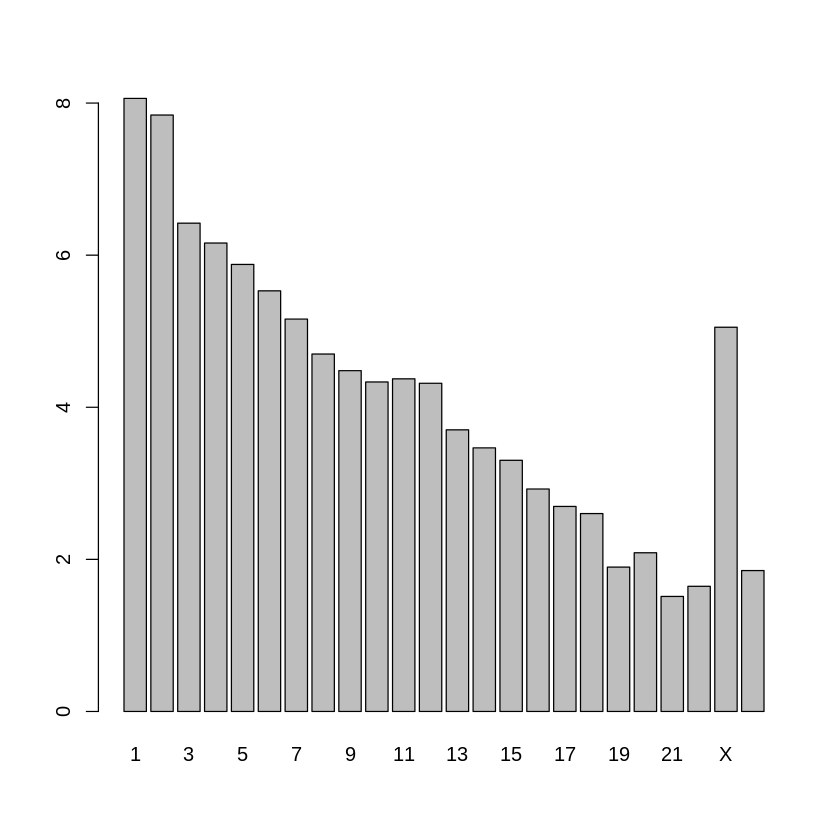

In [8]:
### Insert Your Code Here ###



So far, we have just loaded the DNA sequences in our genome.  However, we also want to understand the position of genes, transcripts, exons, coding sequences and other genomic features.  These types of features will allow us examine regions of the genome that contain the instructions for creating proteins.  To get these genome annotations, we are going to use the `biomaRt` package which offers us an interface the comprehensive [Ensembl]([http://useast.ensembl.org/Homo_sapiens/Info/Index](http://useast.ensembl.org/Homo_sapiens/Info/Index)) database.  First, we check what database collections are available through BioMart.

In [9]:
library(biomaRt)
listMarts()

biomart,version
ENSEMBL_MART_ENSEMBL,Ensembl Genes 96
ENSEMBL_MART_MOUSE,Mouse strains 96
ENSEMBL_MART_SNP,Ensembl Variation 96
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 96


The collection containing general gene annotation information is `ENSEMBL_MART_ENSEMBL`.  We can check which species are available in this collection.

In [10]:
ensembl <- useMart("ENSEMBL_MART_ENSEMBL")
ens_datasets = listDatasets(ensembl)
dim(ens_datasets)
head(ens_datasets)

[1] 184   3

dataset,description,version
abrachyrhynchus_gene_ensembl,Pink-footed goose genes (ASM259213v1),ASM259213v1
acalliptera_gene_ensembl,Eastern happy genes (fAstCal1.2),fAstCal1.2
acarolinensis_gene_ensembl,Anole lizard genes (AnoCar2.0),AnoCar2.0
acitrinellus_gene_ensembl,Midas cichlid genes (Midas_v5),Midas_v5
ahaastii_gene_ensembl,Great spotted kiwi genes (aptHaa1),aptHaa1
amelanoleuca_gene_ensembl,Panda genes (ailMel1),ailMel1


There are 184 species that have genomes in this collection.  We will use the `grep()` function to find the one related to human. If the indexing in the following command is not clear, please make sure you review Lab 3.1.

In [11]:
ens_datasets[grep(pattern="hsapiens", ens_datasets[,1]),]

,dataset,description,version
73,hsapiens_gene_ensembl,Human genes (GRCh38.p12),GRCh38.p12


We can now load our selected Ensembl dataset.

In [12]:
ensembl <- useMart("ENSEMBL_MART_ENSEMBL", dataset = "hsapiens_gene_ensembl")
ensembl

Object of class 'Mart':
  Using the ENSEMBL_MART_ENSEMBL BioMart database
  Using the hsapiens_gene_ensembl dataset

We can use different filtering criteria to query the Ensembl database. `listFilters()` retrieves these 420 possible different criteria:

In [13]:
dim(listFilters(ensembl))
head(listFilters(ensembl))

[1] 420   2

name,description
chromosome_name,Chromosome/scaffold name
start,Start
end,End
band_start,Band Start
band_end,Band End
marker_start,Marker Start


And our queries are able to return any attributes in the Ensembl database.  We can investigate those 3316 different attributes with `listAttributes()`.

In [14]:
allAttr <- listAttributes(ensembl)
dim(allAttr)
head(allAttr, 15)

[1] 3316    3

name,description,page
ensembl_gene_id,Gene stable ID,feature_page
ensembl_gene_id_version,Gene stable ID version,feature_page
ensembl_transcript_id,Transcript stable ID,feature_page
ensembl_transcript_id_version,Transcript stable ID version,feature_page
ensembl_peptide_id,Protein stable ID,feature_page
ensembl_peptide_id_version,Protein stable ID version,feature_page
ensembl_exon_id,Exon stable ID,feature_page
description,Gene description,feature_page
chromosome_name,Chromosome/scaffold name,feature_page
start_position,Gene start (bp),feature_page


The `getBM()` function is the way to query our dataset for results.  This function returns a `data.frame` whose rows are all of the genomic features that have specified column attributes. For example, if we wanted to return all 414 of the features with a unique `chromosome_name` attribute in this dataset (i.e. all chromosomes names):

In [15]:
info <- getBM(attributes = c("chromosome_name"), mart = ensembl)
dim(info)
head(info)

[1] 414   1

chromosome_name
1
10
11
12
13
14


If we wanted to return multiple important attributes for *all 65065 genes* in the dataset, we could use the following:

In [16]:
gene_attribs <- c("external_gene_name", "ensembl_gene_id", "chromosome_name",
                  "start_position", "end_position", "strand", "gene_biotype")
info <- getBM(attributes = gene_attribs,
      mart = ensembl)
dim(info)
head(info)

[1] 65065     7

external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,gene_biotype
MT-TF,ENSG00000210049,MT,577,647,1,Mt_tRNA
MT-RNR1,ENSG00000211459,MT,648,1601,1,Mt_rRNA
MT-TV,ENSG00000210077,MT,1602,1670,1,Mt_tRNA
MT-RNR2,ENSG00000210082,MT,1671,3229,1,Mt_rRNA
MT-TL1,ENSG00000209082,MT,3230,3304,1,Mt_tRNA
MT-ND1,ENSG00000198888,MT,3307,4262,1,protein_coding


If we wanted to filter for genes that are only on chromosome 21, we can provide a vector of filter names for the `filter=` argument and then a list with the values those filters can take on for the `values=` argument.

In [17]:
info <- getBM(attributes = gene_attribs,
             filters = c("chromosome_name"),
             values = list(21),
             mart = ensembl)
dim(info)
head(info)

[1] 852   7

external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,gene_biotype
FP565260.4,ENSG00000279493,21,5011799,5017145,1,protein_coding
FP565260.3,ENSG00000277117,21,5022493,5040666,1,protein_coding
FP565260.5,ENSG00000279687,21,5073458,5087867,1,antisense
GATD3B,ENSG00000280071,21,5079294,5128425,-1,protein_coding
FP565260.2,ENSG00000276612,21,5116343,5133805,-1,protein_coding
FP565260.1,ENSG00000275464,21,5130871,5154734,-1,protein_coding


The genes contain the DNA instructions that can produce one or many mRNA transcripts. To return transcript level information, we just need to make sure we ask for transcript level attributes, such as `ensembl_transcript_id`, `transcript_start`, `transcript_end`, `transcript_biotype`. 

**Question 1.3 [3 points]**:  Use the `getBM()` function to answer how many transcripts are on chromosome 21.

In [18]:
### Insert Your Code Here ###




[1] 2508   11

external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,gene_biotype,ensembl_transcript_id,transcript_start,transcript_end,transcript_biotype
RNA5-8SN1,ENSG00000278189,21,8439823,8439975,1,rRNA,ENST00000619471,8439823,8439975,rRNA
RF00019,ENSG00000199698,21,23432181,23432282,-1,misc_RNA,ENST00000362828,23432181,23432282,misc_RNA
RF00156,ENSG00000207098,21,32841861,32841995,-1,snoRNA,ENST00000384370,32841861,32841995,snoRNA
RF00019,ENSG00000277777,21,5597390,5597490,1,misc_RNA,ENST00000610788,5597390,5597490,misc_RNA
RF01518,ENSG00000275664,21,8205851,8205940,1,misc_RNA,ENST00000610482,8205851,8205940,misc_RNA
RNA5SP492,ENSG00000223262,21,42221173,42221286,1,rRNA_pseudogene,ENST00000411330,42221173,42221286,rRNA_pseudogene


*[Insert Your Response Here]*

**Question 1.4 [3 points]**:  Use the `getBM()` function to answer many transcripts the gene with the `external_gene_name` of WRB has.  What is the ensembl_gene_id of this gene? What are some of the transcript names?  How long is its longest transcript?

In [19]:
### Insert Your Code Here ###




[1] 24 11

external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,gene_biotype,ensembl_transcript_id,transcript_start,transcript_end,transcript_biotype
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000415847,39377698,39406615,protein_coding
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000647678,39379539,39397887,protein_coding
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000650376,39379571,39397743,protein_coding
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000333781,39380244,39397889,protein_coding
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649170,39380326,39397889,protein_coding
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000623703,39380354,39414288,nonsense_mediated_decay


[1] 48113

*[Insert Your Response Here]*

It is easier to see how multiple transcript isoforms for the same gene relate to and overlap each other with a picture rather than these annotation tables.  The `autoplot()` function will allow us to visualize the genomic features in a particular region, but first we must convert our Ensembl dataset to a database of transcripts (TxDB).

In [20]:
library(GenomicFeatures)
### The following three lines convert our Ensembl annotation database to at TxDb transcript database. 
### This takes a while to run, so I have provided the saved sql database in the lab folder.
# TxDb.Hsap.Ens <- makeTxDbFromBiomart(dataset = "hsapiens_gene_ensembl")
# TxDb.Hsap.Ens
# saveDb(TxDb.Hsap.Ens, file = "TxDb.Hsap.Ens.sqlite")


### We can load my already converted database
TxDb.Hsap.Ens <- loadDb("TxDb.Hsap.Ens.sqlite")
TxDb.Hsap.Ens

Loading required package: AnnotationDbi
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Data source: BioMart
# Organism: Homo sapiens
# Taxonomy ID: 9606
# Resource URL: www.ensembl.org:80
# BioMart database: ENSEMBL_MART_ENSEMBL
# BioMart database version: Ensembl Genes 95
# BioMart dataset: hsapiens_gene_ensembl
# BioMart dataset description: Human genes (GRCh38.p12)
# BioMart dataset version: GRCh38.p12
# Full dataset: yes
# miRBase build ID: NA
# transcript_nrow: 227492
# exon_nrow: 771727
# cds_nrow: 303052
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2019-04-08 02:14:35 -0500 (Mon, 08 Apr 2019)
# GenomicFeatures version at creation time: 1.32.3
# RSQLite version at creation time: 2.1.1
# DBSCHEMAVERSION: 1.2

You should see some metadata about the loaded TxDb. Including the source of the assembly and annotations as well as the number of transcripts, exons, and coding sequences.

In order to operate with the transcript database, we will need to be able to use the IRanges and GRanges classes. IRanges are intervals specified by a start and end, with additional metadata.  For example, `IRanges(5,100)` creates an interval of length 96 that starts at 5 and ends at 100. 

**Question 1.5 [2 points]**:  Create an IRanges object that extends from the lowest `transcript_start` of any of the transcripts of WRB and goes to the highest `transcript_end`.  What is the length of this genomic region (Hint: use the `width()` function)? Create a second IRange that extends this genomic region by 20 kilobases on either side.

In [21]:
### Insert Your Code Here ###




[1] 50831

*[Insert Your Response Here]*

The `GRanges` library is an extension of IRanges also specifically tracks the chromosome name of each interval, (e.g. `GRanges(seqnames = "X", ranges = IRanges(5, 100))`).  In order to plot our WRB transcripts, we need to specify the `which=` parameter with a GRanges object that covers the region we wish to view.  

**Question 1.6 [3 points]**:  Fill in the `autoplot()` code below to show all transcripts of WRB with up to 20 kb on either side.   

Loading required package: ggplot2
Need specific help about ggbio? try mailing 
 the maintainer or visit http://tengfei.github.com/ggbio/

Attaching package: 'ggbio'

The following objects are masked from 'package:ggplot2':

    geom_bar, geom_rect, geom_segment, ggsave, stat_bin, stat_identity,
    xlim

Parsing transcripts...
Parsing exons...
Parsing cds...
Parsing utrs...
------exons...
------cdss...
------introns...
------utr...
aggregating...
Done
Constructing graphics...


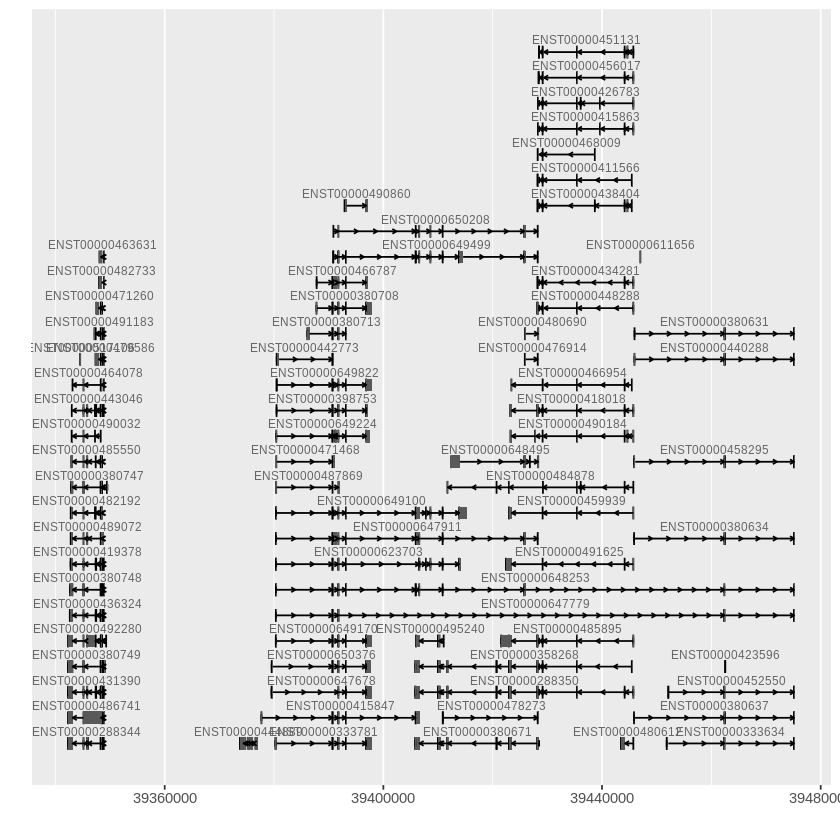

In [22]:
library(ggbio)
autoplot(TxDb.Hsap.Ens,
         which = ### Insert Your Code Here ###,
         names.expr = "tx_name")

This shows several transcript isoforms (horizontal lines) for the same gene that are composed of possible different collections of exons (rectangles), segments that will be preserved in mature mRNA after introns have been removed by slicing.   

**Question 1.7 [3 points]**:  Using the attributes `ensembl_exon_id`, `exon_chrom_start`, `exon_chrom_end` in getBM(), count the number of exons for each transcript of WRB and return the transcript with the most exons.  

In [23]:
### Insert Your Code Here ###



[1] 118  14

external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,gene_biotype,ensembl_transcript_id,transcript_start,transcript_end,transcript_biotype,ensembl_exon_id,exon_chrom_start,exon_chrom_end
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000415847,39377698,39406615,protein_coding,ENSE00001628955,39405914,39406615
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000415847,39377698,39406615,protein_coding,ENSE00003788222,39393166,39393280
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000415847,39377698,39406615,protein_coding,ENSE00003651735,39391769,39391836
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000415847,39377698,39406615,protein_coding,ENSE00003757548,39390698,39390863
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000415847,39377698,39406615,protein_coding,ENSE00003839994,39377698,39377824
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000647678,39379539,39397887,protein_coding,ENSE00003836461,39396866,39397887


ENST00000649499 
             10

*[Insert Your Response Here]*

Finally, not all sequences that become exons will also be translated to amino acid chains in proteins.  The subset of exon sequences that are translated are called the *coding sequences*.   

**Question 1.8 [3 points]**:  Using the attributes `cds_start` and `cds_end` in `getBM()`, find out which `ensembl_exon_id` of the selected transcript from the previous question have a) all, b) some, and c) none of their mRNA sequences translated into amino acids.  

In [24]:
### Insert Your Code Here ###



[1] 10 16

external_gene_name,ensembl_gene_id,chromosome_name,start_position,end_position,strand,gene_biotype,ensembl_transcript_id,transcript_start,transcript_end,transcript_biotype,ensembl_exon_id,exon_chrom_start,exon_chrom_end,cds_start,cds_end
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649499,39390829,39428504,nonsense_mediated_decay,ENSE00003758866,39408606,39408677,NA,NA
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649499,39390829,39428504,nonsense_mediated_decay,ENSE00003841123,39406562,39406731,NA,NA
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649499,39390829,39428504,nonsense_mediated_decay,ENSE00003837382,39405914,39406058,219,289
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649499,39390829,39428504,nonsense_mediated_decay,ENSE00003788222,39393166,39393280,104,218
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649499,39390829,39428504,nonsense_mediated_decay,ENSE00003838515,39428232,39428504,NA,NA
WRB,ENSG00000182093,21,39377698,39428528,1,protein_coding,ENST00000649499,39390829,39428504,nonsense_mediated_decay,ENSE00003839847,39425760,39426034,NA,NA


[1] "ENSE00003788222" "ENSE00003651735" "ENSE00003832151"

[1] "ENSE00003837382"

[1] "ENSE00003758866" "ENSE00003841123" "ENSE00003838515" "ENSE00003839847"
[5] "ENSE00003838897" "ENSE00003758202"

*[Insert Your Response Here]*

Finally, we can use BioMart to retrieve the related DNA sequences of any region or feature of interest. For example, to extract only the coding DNA sequences related to the transcript `ENST00000647678`, we can use the `getSequences()`.  The `type=` argument is the annotation feature type we wish to extract that the `id=` will match.  

In [25]:
coding_sequence <- getSequence(id = "ENST00000647678",
                               type = "ensembl_transcript_id",
                               seqType = "coding",
                               mart = ensembl)
coding_sequence

coding,ensembl_transcript_id
ATGATCTCACTCATTTGGAAGTATTATTCTGTCCCTGTGGCTGTCGTGCCGAGTAAATGGATAACCCCTCTAGACCGCCTGGTAGCCTTTCCTACTAGAGTAGCAGGTGGTGTTGGAATTACCTGTTGGATTTTAGTCTGTAACAAAGTTGTCGCTATTGTGCTTCATCCGTTCAGCTGA,ENST00000647678


This function returns a character string.  However, if we convert this into a `BioString` object, than it can then be manipulated further.   There are several subclasses of BioStrings: including `DNAString`, `RNAString`, `AAString`. Each of these will enforce their appropriate alphabets and specialized functions.  

**Question 1.9 [2 points]**:  Since we extracted the coding sequence only for ENST00000647678, use the `DNAString` class and the `translate()` function to help convert from our `coding_sequence` string above to the corresponding sequence of amino acids.  How many amino acids does the corresponding protein have? What is the first and last amino acids (more information about the abbreviations with `?AMINO_ACID_CODE`)?  The `*` character indicates a stop codon and should only appear at the end of your sequence.

In [26]:
coding_sequence <- getSequence(id = "ENST00000647678",
                               type = "ensembl_transcript_id",
                               seqType = "coding",
                               mart = ensembl)
### Insert Your Code Here ###



  60-letter "AAString" instance
seq: MISLIWKYYSVPVAVVPSKWITPLDRLVAFPTRVAGGVGITCWILVCNKVVAIVLHPFS*

*[Insert Your Response Here]*

This translation can be checked directly using `seqType = "peptide"` in our getSequence() call.

In [27]:
protein <- getSequence(id = "ENST00000647678",
                      type = "ensembl_transcript_id",
                      seqType = "peptide",
                      mart = ensembl)
protein

peptide,ensembl_transcript_id
MISLIWKYYSVPVAVVPSKWITPLDRLVAFPTRVAGGVGITCWILVCNKVVAIVLHPFS*,ENST00000647678


### Problem 2: Extracting G/G Content of UTRs (15 Points)
Now that we have seen how to access different types of genomic features using different filtering criteria and to extract the corresponding gene, mRNA, or protein sequences, we are going to use our knowledge to build a dataset that captures the DNA nucleotide frequency in special regions of each transcript called Untranslated Regions or *UTRs*.  These UTRs are found both upstream of the translated sequence on the 5' (five prime) end of the transcript and downstream on the 3' (three prime) end.  These UTRs can play important roles in the stabilization of mature mRNAs and the regulation of the translation process at the ribosome.

**Question 2.1 [4 points]**: Use the `getSequence()` we saw in the previous section to extract a 5' UTR sequence for each of the `ensembl_transcript_id` transcripts that are on the first 50MB (50 million bases) on chromosome 13.  Note, the functions arguments `chromosome=`, `start=`, and `end=`, which we did not use previously, may be helpful for this task.  You will also need to look up the different values that the `seqType=` argument can take. Remember, the help text for a function can always be accessed with the `?` operator (`?getSequence`). Repeat this sequence extraction task for the downstream 3' UTRs as well. How does this function handle missing sequences?

In [28]:
fiveprime_utrs <- getSequence(### Insert Your Code Here ###)
head(fiveprime_utrs$`5utr`)

threeprime_utrs <- getSequence(### Insert Your Code Here ###)
head(threeprime_utrs$`3utr`)

[1] "ATGCGCCGCGCCAGCAGAGACTACACCAAGTACCTGCGTGGCTCGGAGGAGATGGGCGGCGGCCCCGGAGCCCCGCACGAGGGCCCCCTGCACGCTCC"                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
[2] "CTTTTCCCTCAAGTAGACTTTATGCCATACAGCTATTTTCTTGCCCCAGTTCTAGCAGAATCTAACCAGTGTTCTAGAAGAAAATGTCCTGCCCCCATGCAGTCTCCTTAGAATTGCAGGGTGCTGCTCAGAACTGCTCCTGTGGAGAGCTTTGTCTGTTGTTTGGATCCAGCAGCGTCTTTGGGGGTGTTGCTTGAAGCTTGCCAAGGAGGAGAGGGGGGTTCTGAAGAGAGAACACCAGGGCTCTAGCCTGTCACATAACTGGGGGTGTGGAGAGCGCCTCATTGCCACTGCAGTGACTAAAGCTGGGAAGACGCTGGTCAGTTCACCTGCCCCACTGGTTGTTTTTTAAACAAATTCTGATACAGGCGACATCCTCACTGACCGAGCAAAGATTGACATTCGTATCATCACTGTGCACCATTGGCTTCTAGGCACTCCAGTGGGGTAGGAGAAGGAGGTCTGAAACCCTCGCAGAGGGATCTTGCCCTCATTCTTTGGGTCTGAAACACTGGCAGTCGTTGGAAACAGGACTCAGGGATAAACCAGCGCA"
[3] "GTTGCTGAAGCTTCATCCTTTGCTCTCATTCTGTAAGTCATAGAAAAGTTTGAAACATTCTGTCTGTGGTAGAGCTCGGGCCAGCTGTAGTTCATTCGCCAGTGTGCTTTTCTTAATATCTAAG"                                                                                                                                                                                                                                                                                                                                                                                                                                             
[4] "GTTGTACAGAAAATTGCTGTTGGG"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
[5] "GGAAAGACGCGGGAGGTCTCTGGCCTGACACT"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
[6] "CGGGTTTGTCGGGCTGAAATGTGGCGGGTCTCGGAAGGTTCCGACCTCAGTAAAGAGAGCTAACGTGTATTCTTCTTTTTCTTAGCGTGTTGCTTTGTCGCCCACGCTGGTTGCAGTGGTGCGATCTCAGTTCACTGCAACCTTCGCCTCCCAGGTTCAAGCGATTATCCTGCCTCAGCTTCCCGAGCAGCTAGGACTACAGGTGTGTGCCATCACGCTCAGCTAATTTTTTTGGTATTTTTAGTAGAGATGGGGTTTTCCCATGTTGGCCAGGCTGGTCTCGAACTCCTGACCTCAGATGATCTGCCCGCCTCGGCCTCCCAAAGTGGTAGGATTACAGGCGTGAGCCACTGTGCTCGGCACATTTTGATGCTGAG"

[1] "TGTAATCATAGCTCACTTTAACCTTGAACTCCTGGACTCAAGCAATCCTCCAACCTCAGCCTCCCAAGTAGCTGGGACTACAGGCCTAAATAAACAAGATGAAAAGCAGTTACAAGAACTTGCACTGGAAGAAAGGCAAACCATTGATCAAAAAATCAACATGTTGTACAATGAGCTTTTCCAGAGCCTTGTGCCAAAGGAGAAATATGACAAAAATGATGTTATTTTAGAGGTGACAGCTGGAAGGACTACTGGAGGTGACATCTGCCAACAATTTACCCGAGAAATATTTGACATGTACCAGAATTATTCGTGCTATAAACACTGGCAATTTGAACTTCTGAATTATACACCAGCAGATTATGGTAGGCATATTGAGGAATTTGCCTGTAGGAGATACTGAAAATTATTTTACCTCTGATCTTGATTAGAACCATATTGTCCCATTTTTTTTTGAAACTTTTGGTGTATATCTACTAAACACTGTGGCATAGGCTCATCAATCACAGTGGCTTACTATTATAGCAGAGTTGTTAGCTAGGAGAAGACAGTAGAAAGGAGGGAAGCATTTGCTTAGGGAGAAATATGTGAATTAGAGAAAATTCCCCTGAGGAACTTAGATACGTATCTTGCCTCAAAATCATTTTTCTCTATTATTGAAAGCAAAGGTATATTAAGGTTTTTACTTTAAATAACTTTATAAAATAATATAAGTATTACTAATTAGA"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
[2] "AAGTAAAATACTCAGACATGTGCACCACCCCCAGGATTGTGATCTCACATGTATTTCTTTAAGCCTCCCCCAGGAAATTGT"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
[3] "GTTGTTTGCAGTCTTCAGTTGTGTTCTTATGCTTCAGTGTCACATTTCATTTCATTTGAAACTAAAATTTTAAGTAAAGCTGAAATAAACTTCTTGTCATTGTCTGCCTTTTGATAATTTTAAAGAAATAACTTTCCATAAGTAAAAAATTATATATCTCTTTGGATATAAATGATTTTTAAAAGATGTTTATTTAAAAAGTCA"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

*[Insert Your Response Here]*

Let us take the first returned 5' UTR, and convert it to a `DNAString`.  We can use this subclass of Biostrings and extract the counts of each nucleotide type with the `alphabetFrequency()`.  The `baseOnly=TRUE` argument will only return counts for the four DNA nucleotides and an single `other` bin.

In [29]:
myDNAseq <- DNAString(fiveprime_utrs$`5utr`[1])
alphabetFrequency(myDNAseq, baseOnly = TRUE)

A     C     G     T other 
   17    38    34     9     0

DNA nucleotides are complementary with 1) `A`- adenine binding to `T`- thymine and 2) `C`- cytosine pairing with `G`- guanine.  One property researchers study about the genome is its "G/C content", the percentage of base pairs that are either G or C. Different regions of the genome are known to have different G/C content characteristics which often relate to their function.

**Question 2.2 [6 points]**: Write a function `seq2gcpercent()` that takes in the output from `getSequence()`, and returns a vector with the percentage for each sequence of it bases that are G or C.   If the sequence in the `getSequence` result is missing, skip its output in the the returned percentage vector.  Use this function to calculate `fiveprime_gc` and `threeprime_gc` from the `fiveprime_utrs` and `threeprime_utrs` above.  

In [30]:
seqs2gcpercent <- function(seqs){
  ### Insert Your Code Here ###

  # remember to handle missing getSequence() values
    
}

fiveprime_gc <- seqs2gcpercent(fiveprime_utrs$`5utr`)
head(fiveprime_gc)
threeprime_gc <- seqs2gcpercent(threeprime_utrs$`3utr`)
head(threeprime_gc)

C         C         C         C         C         C 
0.7346939 0.5081374 0.4193548 0.4166667 0.6250000 0.5305040

C         C         C         C         C         C 
0.3585165 0.4320988 0.2450980 0.4049039 0.4176245 0.2958028

**Question 2.3 [5 points]**: For each G/C content percentage vector, `fiveprime_gc` and `threeprime_gc`, what is their length, mean, and standard deviation?  Use the histogram `hist()` function to show their distributions on the same plot (tips on using the `add=T` and `col=` arguments for overlapping histograms [here]([https://www.r-bloggers.com/overlapping-histogram-in-r/](https://www.r-bloggers.com/overlapping-histogram-in-r/))).

[1] 541.0000000   0.5926958   0.1257303

[1] 537.00000000   0.37333478   0.06615499

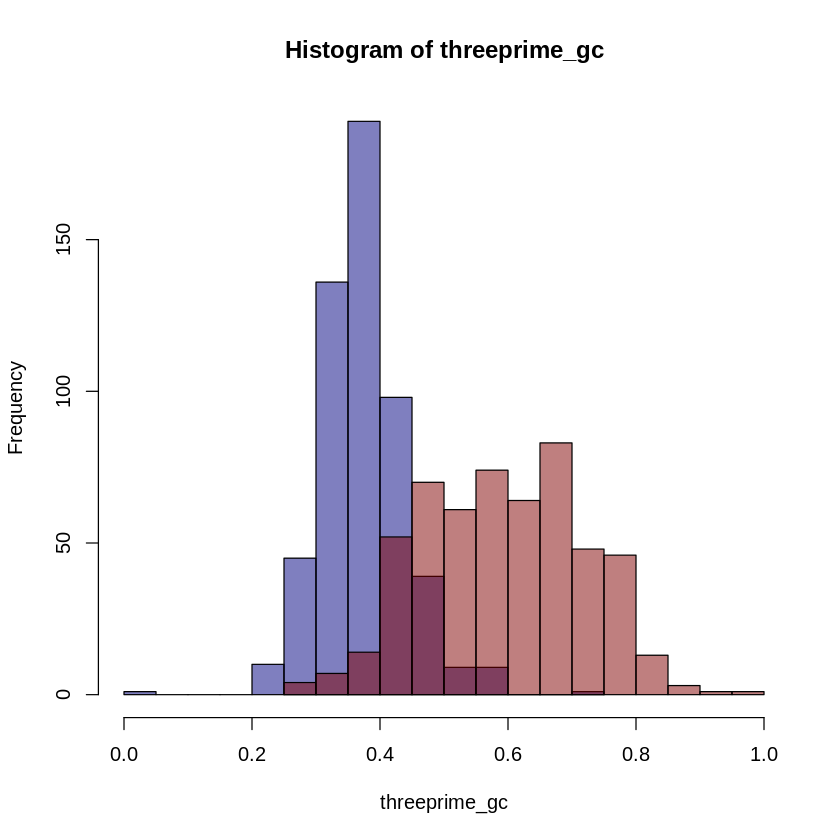

In [31]:
### Insert Your Code Here ###




*[Insert Your Response Here]*

### Problem 3: Gaussian Mixture Models and Expectation Maximization (35 points)
In this section, we are going to attempt to model the G/C content of the 3' and 5' UTRs as a mixture of Gaussians.  Since we will assume that we do not have the true source labels, we will use the Expectation Maximization algorithm to iteratively improve our model's ability to describe the data. 

But first, let's consider parameter estimation when we do know the source labels.  

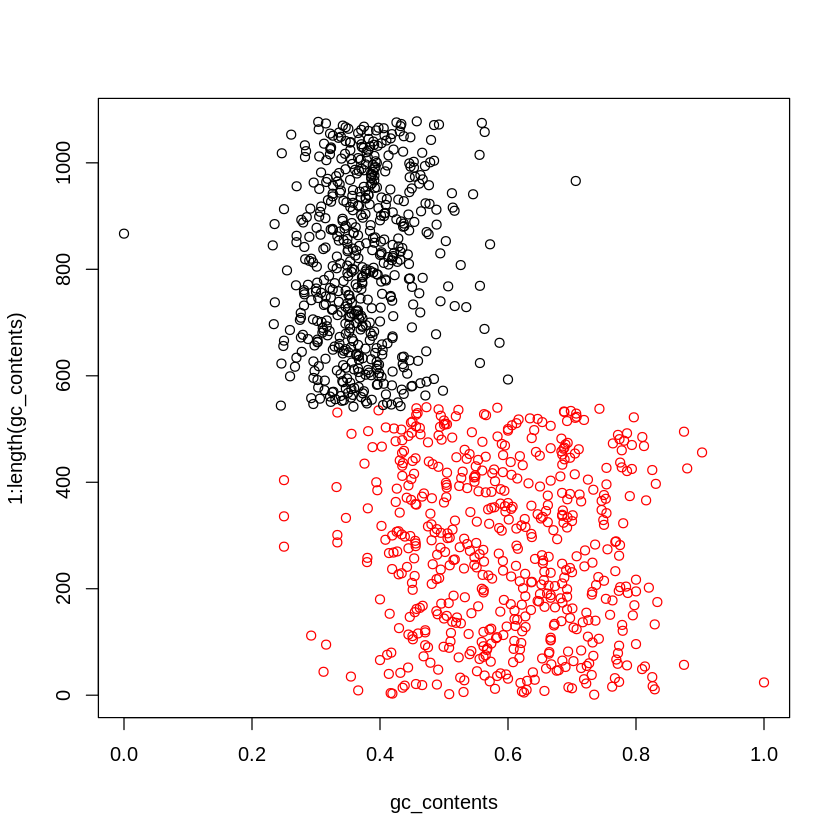

In [32]:
gc_contents <- c(fiveprime_gc, threeprime_gc)
region_label <- c(rep("5prime", length(fiveprime_gc)),
                  rep("3prime", length(threeprime_gc)))
plot(x = gc_contents, y = 1:length(gc_contents), col = as.factor(region_label))

We assume our G/C percentage values come from one of two different normal distributions depending on its source, 3' or 5'.  These are the first ($k=1$) and second ($k=2$) components of our Gaussian Mixture Model (GMM). We can compute the maximum likelihood estimates (MLE) for each of those distributions
- $\mu_{k} = \frac{1}{N_{k}} \sum\limits_{n=1}^{N_{k}}x_{n,k}$
- $\sigma_{k}^2 =  \frac{1}{N_{k}}  \sum\limits_{n=1}^{N_{k}}(x_{n,k} - \mu_{k})^2$

We roughly performed this step in the last question of the previous section when we calculated the mean and standard deviations for each group of G/C percentages separately.

However, let's pretend that we no longer know which type of UTR each G/C percentage relates to. It is more difficult to see that these values are a mix of two distributions in the unlabeled, shuffled version of the previous plot.

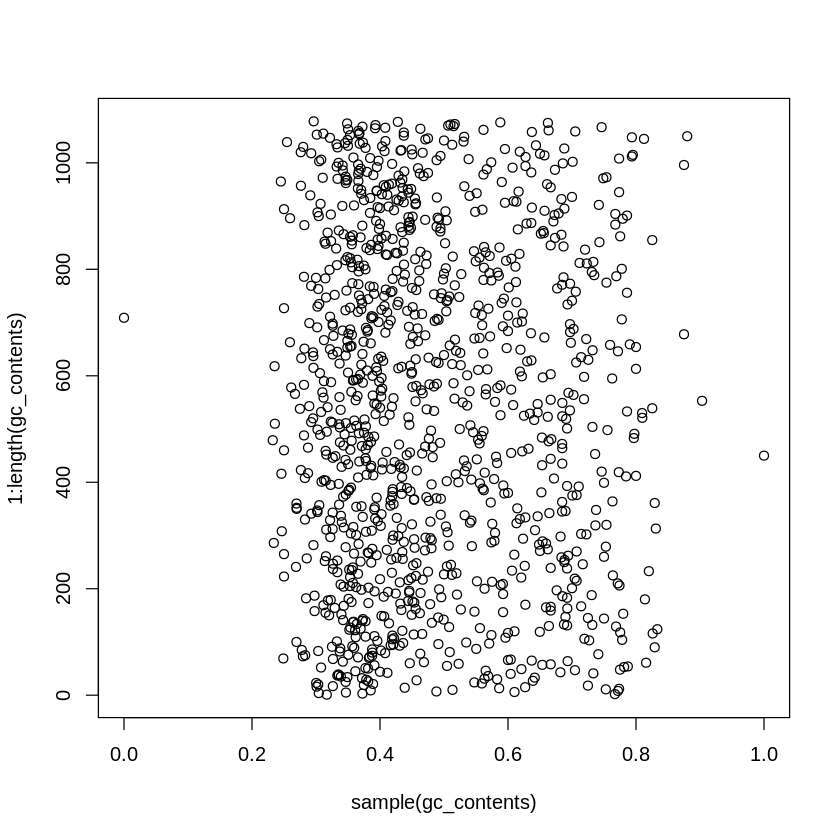

In [33]:
plot(x = sample(gc_contents), y = 1:length(gc_contents))

However, if we look at the overall density distribution, there are multiple modes, suggesting that a mixture of distributions might be appropriate.

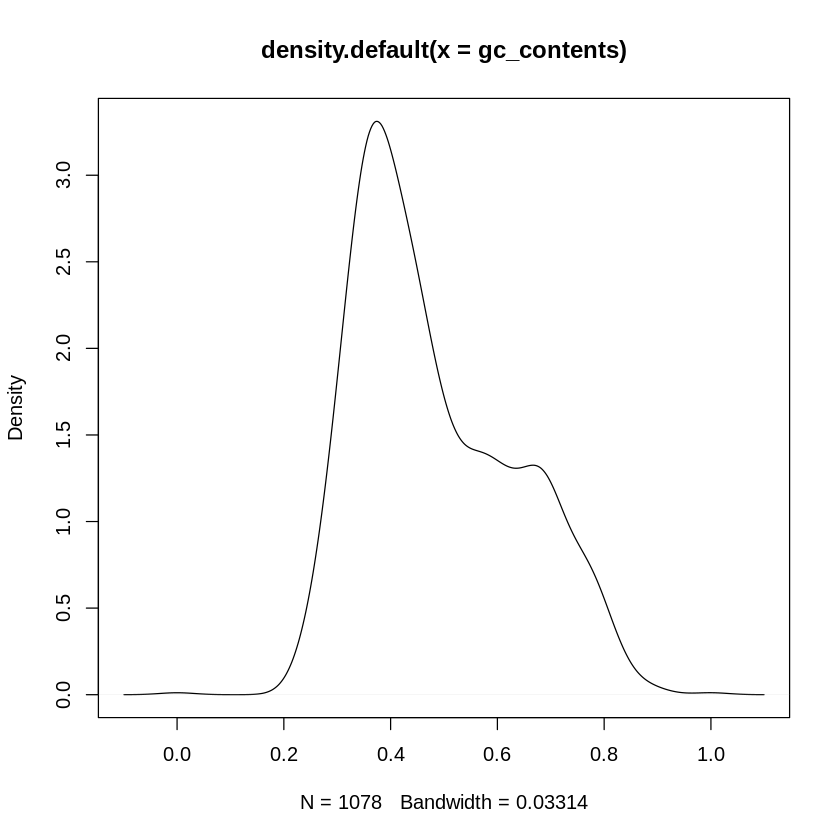

In [34]:
plot(density(gc_contents))

But without the labels on the data, we cannot apply MLE to estimate the parameters of the distributions.  The EM algorithm is based on the idea, that we can assign each sample to its most probable label, update our MLE distribution parameters, and repeat until convergence.  This iterative method considers the probabilities that all samples may belong to any of our $K$ component distributions, a concept called 'soft' assignment, vs the similar k-means algorithm which iteratively updates making 'hard' assignments. 

Using similar notation from the supplementary materials in lecture, we represent a Gaussian Mixture Model mathematically as:

$$p(X|\mu,\sigma,\pi) = \sum_{k=1}^{K}\pi_k\mathcal{N}(X|\mu_{k},\sigma_{k}^{2})$$

- $X=$ Dataset of N elements {$x_1, ..., x_N$}
- $\mu_k=$ Mean of the kth component
- $\sigma_k=$ Standard deviation of the kth component
- $\pi_k=$ mixing coefficient for the kth component, $\sum_{k=1}^{K} \pi_k$=$1$ 
- $\mathcal{N}(X|\mu_{k},\sigma_{k}^{2}) =$ Probability density function of Gaussian for the kth component 

There are three steps to the EM algorithm that we will work through one at a time before putting it all together:
1. Initialization
2. Expectation (E-step)
3. Maximization (M-step)

For Initialization, we must choose a method for the initial assignment of the parameters of our model.  There are many different ways this can be done, but we will use the common approach to run K-means on the data and recover its 'hard' assignment of labels to inform our initial values.

**Question 3.1 [3 points]**: Use the `kmeans()` function on our `gc_contents` dataset using two clusters. Recover the cluster assignments from the output and recreate the red/black scatterplot from above, this time coloring the points using those cluster assignments.

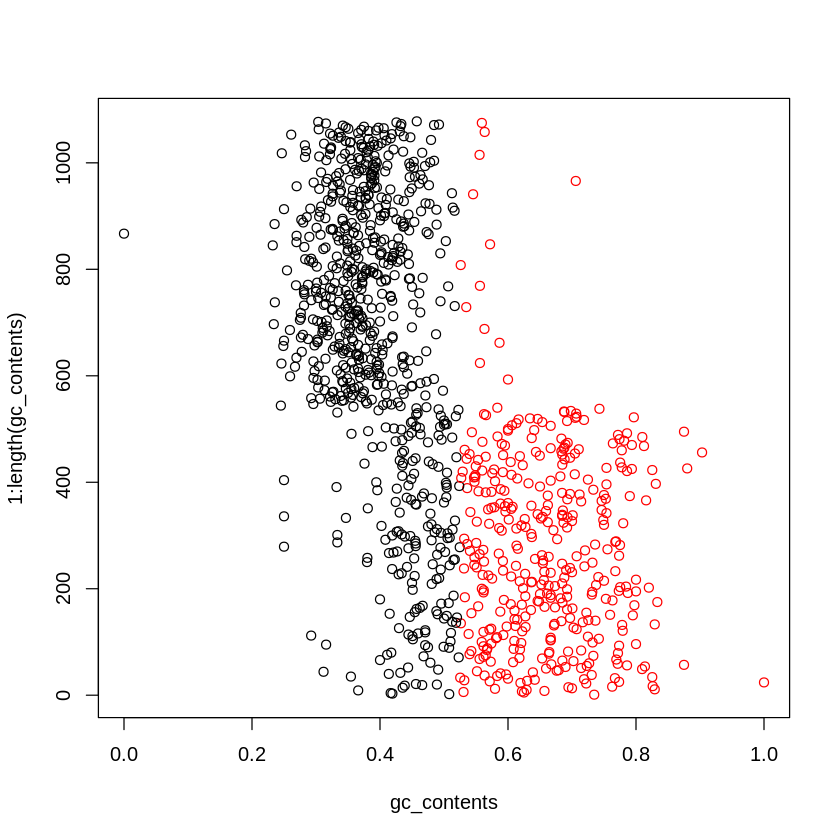

In [35]:
set.seed(1) # seed random number generator to produce the same initial clustering
### Insert Your Code Here ###




Now that we have assigned our samples to one of two components, we can estimate the parameters of each distribution and the mixing coefficients using the means, standard deviations, and percentage of samples for each component.

**Question 3.2 [4 points]**: Complete the function `estimate_component_parameters()` below.  It will take in a component label, $k$, (i.e. 1 or 2 in this case), the data, and the current sample assignments and return $\mu_k$, $\sigma_k$, and $\pi_k$ as a list.  What are the initial estimated parameters of the first component?

In [36]:
#' Estimate Component Parameters
#'
#' Estimate the parameter values of a component k given the data and the
#' current sample assignments
#'
#' @param label, integer value of the kth component
#' @param data, An N length vector containing the values for each sample
#' @param current_assignment, An N length vector containing the component each sample 
#' is assigned to
#' @return List containing the mean, stdev, and mix coefficient for the given component
estimate_component_parameters <- function(label, data, current_assignment){
  ### Insert Your Code Here ###

    
  return(list(mean = ### Insert Your Code Here ###
              , stdev = ### Insert Your Code Here ###
              , mix = ### Insert Your Code Here ###
              ))
}

estimate_component_parameters(1, data = gc_contents,
                              current_assignment = cluster_assign)

$mean
[1] 0.3895263

$stdev
[1] 0.06790785

$mix
[1] 0.6530612

We can use the `lapply()` function to apply our created function above to every component.  This returns a list indexed by the component integer, in which every element is a list indexed by the parameter name. If you have completed and run the previous cells, the following code will compute all component parameters and output the estimated mean of the second component: 

In [37]:
params <- lapply(1:2, estimate_component_parameters, data = gc_contents,
                 current_assignment = cluster_assign)
params[[2]]$mean

[1] 0.6601676

Also, now that we have our initial component assignments and parameter estimates, we can make a quick plot to show our initial mixture.

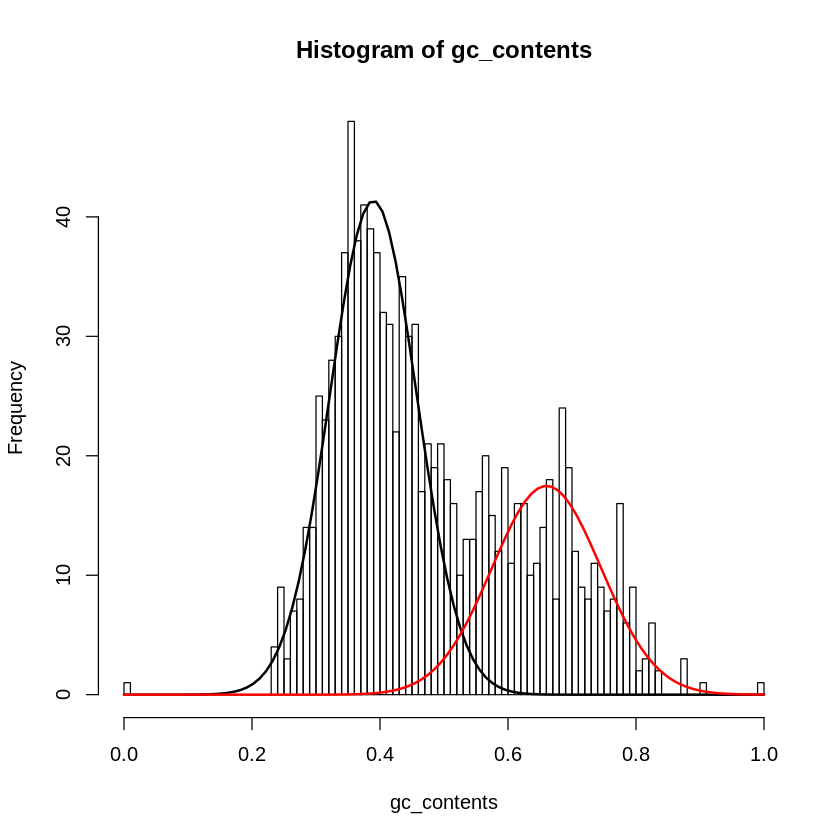

In [38]:
h <- hist(gc_contents, breaks = 80)
x <- seq(0, 1, length = 100)
for (comp in 1:2){
  lines(x, length(gc_contents) / 100 * params[[comp]]$mix *
          dnorm(x, mean = params[[comp]]$mean, sd = params[[comp]]$stdev),
        lwd = 2, col = comp)
}

The Expectation Step of the EM algorithm attempts to calculate the probability that each sample data point $x_n$ belongs to each component $k_i$. Mathematically we are trying to find the *posterior* probability,  $P(x_n \in k_i | x_n)$,  We can calculate this value using Bayes' rule:
	$$ P(x_n \in k_i | x_n) = \frac{P(x_n | x_n \in k_i | x_n)P(k_i)}{P(x_n)}$$
because each of the components above relate directly to our GMM equation:

 - $P(x_n | x_n \in k_i ) = \mathcal{N}(x_n|\mu_{k_i},\sigma_{k_i}^{2})$ 	 
 - $P(k_i) = \mu_{k_i}$ 
 - $P(x_n) = \sum_{k=1}^{K}\pi_{k}\mathcal{N}(x_n|\mu_{k},\sigma_{k}^{2})$ 

To calculate this probability in R we will need to use the `dnorm()` function which given `x=`, `mean=`, and `sd=`, returns the value of probability density function of a normal distribution with mean `mean` and standard deviation `sd` at the value of `x`.

To assess the quality of our fit of our GMM, we will use the *likelihood* probability of the data given the model that we have seen before:
$$p(X|\mu,\sigma,\pi) = \sum_{k=1}^{K}\pi_k\mathcal{N}(X|\mu_{k},\sigma_{k}^{2})$$
Rather than multiplying many small probabilities, we will instead sum the log likelihoods.
$$\ln p(X|\mu,\sigma,\pi) = \sum_{n=1}^{N} \ln \Bigg\{ \sum_{k=1}^{K}\pi_k\mathcal{N}(x_n|\mu_{k},\sigma_{k}^{2}) \Bigg\}$$

**Question 3.3 [8 points]**: Complete the function `e.step` below.  It will take in our data and the parameters list of lists (like `params` created above). First it must compute the matrix of posterior probabilities using the formulation above and the `dnorm()` function.  It should also calculate the total log likelihood for the entire dataset.  Finally, it should return these values as a list containing two elements, the `posteriors` probability matrix and the `loglike` total log likelihood value. What is the total log likelihood of our G/C content data after initialization and one Expectation step?

In [39]:
#' Expectation Step of the EM Algorithm
#'
#' Calculate the N by K posterior probabilities (soft labels) matrix that each data point has
#' to each component. Also return the total log likelihood of the data given the parameters
#'
#' @param data, An N length vector containing the values for each sample
#' @param params List containing the mean, stdev, and mix coefficient for each component
#' @return Named list containing the posteriors probability matrix and the total loglike
e.step <- function(data, params){
  ### Insert Your Code Here ###  

  # Suggested steps:
  # Calculate N by K product matrix of \pi_k\mathcal{N}(x_n|\mu_{k},\sigma_{k}^{2}) 
  #   using component estimated parameters and dvnorm
  # Calculate the likelihood per sample  
  # Convert product matrix to posterior probability matrix
  # Convert likelihood per sample to total log likelihood 

  return(list(posteriors = ### Insert Your Code Here ### 
              , loglike = ### Insert Your Code Here ###  
              ))
}

e_step_outs <- e.step(gc_contents, params)
head(e_step_outs$posteriors)
e_step_outs$loglike 

8.499943e-06,0.999991500
7.154067e-01,0.284593304
9.913694e-01,0.008630577
9.922302e-01,0.007769812
6.269473e-03,0.993730527
4.650479e-01,0.534952066


[1] 642.902

Once we have the posterior probabilities, we can calculate the most probable assignment of the samples to components.

In [40]:
#' Return Component
#'
#' Given a vector of posterior probabilities, return the maximum probability 
#' assignment of each sample #' to one of the mixture components
#'
#' @param posterior_probs_row, K length vector of posterior probabilities
#' @return Integer index of the largest probability
return_component <- function(posterior_probs_row){
  mymax <- max(posterior_probs_row)
  return(which(posterior_probs_row == mymax)[1])
}
apply(head(e_step_outs$posteriors), 1, return_component)
predicted_labels <- apply(e_step_outs$posteriors, 1, return_component)

[1] 2 1 1 1 2 2

The next step of the EM algorithm is the Maximization step.  In this step, we use our posterior probabilities to re-estimate our component parameters. Rather than using 'hard' assignments as we did in the initialization stage, we will use 'soft' assignments of samples to components.  More concretely, the $N_k$ counts of hard assignments will be replaced with the sum of the posteriors, $P(x_n \in k_i | x_n)$. Our parameter update rules for a component are:


- $\mu_{k} = \frac{\sum_{n=1}^{N_{k}} P(x_n \in k | x_n) x_{n}}{\sum_{n=1}^{N_{k}} P(x_n \in k | x_n)}$
- $\sigma_{k} = \frac{\sum_{n=1}^{N_{k}} P(x_n \in k | x_n) (x_{n}-\mu_k)^2}{\sum_{n=1}^{N_{k}} P(x_n \in k | x_n)}$
- $\pi_{k} = \frac{\sum_{n=1}^{N_{k}} P(x_n \in k | x_n) }{N}$

**Question 3.4 [6 points]**: Complete the function `m.step` below.  It will take in a single component label (i.e. k=1 or k=2), the posterior_probability matrix, and the sample data and return a list of the updated component parameters $\mu_k$, $\sigma_k$, and $\pi_k$ in the same format as `estimate_component_parameters`, (i.e. as a list of `mean`, `stdev`, and `mix`).  What is the mean and standard deviation of the first component after one iteration of the EM algorithm?

In [41]:
#' Maximization Step of the EM Algorithm
#'
#' Update the estimated parameter values for a specified component
#'
#' @param component, Component integer k to return new params for.
#' @param posterior_probs, N by K posterior probability matrix
#' @param data, An N length vector containing the values for each sample
#' @return Named list containing the mean , stdev, and mix coefficients for the kth component.
m.step <- function(component, posterior_probs, data){
  ### Insert Your Code Here ###  
    
    
  return(list(mean = ### Insert Your Code Here ###  
              , stdev = ### Insert Your Code Here ###  
              , mix = ### Insert Your Code Here ###  
              ))
}

m.step(1, posterior_probs = e_step_outs$posteriors, data = gc_contents)

$mean
[1] 0.390767

$stdev
[1] 0.07086193

$mix
[1] 0.6497016

Remember, we can calculate all updated parameters with `lapply()`.  We can also plot our slightly modified distributions. 

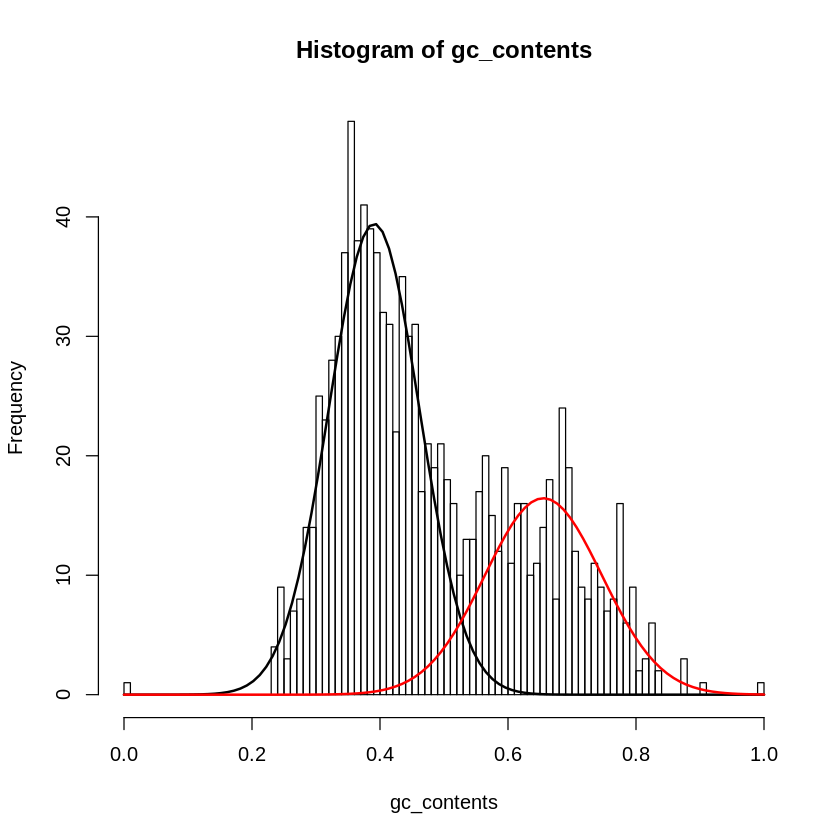

In [42]:
new_params <- lapply(1:2, m.step, posterior_probs = e_step_outs$posteriors,
                     data = gc_contents)
h <- hist(gc_contents, breaks = 80)
x <- seq(0, 1, length = 100)
for (component in 1:2){
  lines(x, (length(gc_contents) / 100 * new_params[[component]]$mix *
             dnorm(x, mean = new_params[[component]]$mean,
                   sd = new_params[[component]]$stdev)),
        lwd = 2, col = component)
}

We are now ready to assemble all of the pieces to create our EM algorithm for GMMs from scratch. We just need to set the algorithm up to repeat the e.step and m.step until convergence or some maximum number of iterations. We will watch the improvement in the log likelihood of the e.step until it is so small, that we consider the algorithm converged. 



**Question 3.5 [8 points]**: Time to put it all together and complete the function `expect_maxim()` below.  It will take in the data, the number of desired components `num_components`, a maximum number of iterations to perform `max_iterations`, and the threshold for our convergence criteria, `converge_crit`.  It will initialize the parameters after running kmeans, and then repeat the e.step and m.step until the change in the `loglike` of the e.step is less than `converge_crit` or the `max_iterations` is hit. Finally, it should return as a list the number of iterations, the final log likelihood, the N by K posterior probability matrix, and the list of list of final component distribution parameters. How many iterations and what is the final log likelihood of the data when you run the `expect_maxim()` function on the `gc_content` G/C percentage data using two clusters?

In [43]:
#' Expectation Maximization Algorithm
#'
#' Calculate the posterior probabilities (soft labels) that each data point has
#' to each component. Also return the total log likelihood of the data given the parameters
#'
#' @param data, An N length vector containing the values for each sample
#' @param params List containing the mean, stdev, and mix coefficient for each component
#' @return Named list containing the posteriors probability matrix and the total loglike
expect_maxim <- function(data, num_components = 2, max_iterations = 100,
                        converge_crit = 0.001){
  set.seed(1)
  ### Insert Your Code Here ###
    
  # Suggested steps:
  # Find initial clustering assignments and component parameter estimates
  # Set up loop 
  # Run e.step with data and params to update loglike and posteriors
  # Run m.step to update component parameter estimates
  # Check looping criteria, break or update previous loglike and restart loop  

    
  return(list(iteration = ### Insert Your Code Here ###
              , loglike = ### Insert Your Code Here ###
              , posteriors = ### Insert Your Code Here ###
              , params = ### Insert Your Code Here ###
              ))
}

EMresults <- expect_maxim(gc_contents, 2, 100, 0.001)
EMresults$iteration
EMresults$loglike


[1] 94

[1] 654.7946

**Question 3.6 [3 points]**: Create the plot of the final estimated distributions on top of the histogram of all samples.  How has it changed since our initial estimates? Using the final posterior probabilities, predict the final component assignments of the samples.  How does this compare to true sample labels we have stored as `region_label`? How many UTRs have not been put in their correct class?

[[1]]
[[1]]$mean
[1] 0.3746543

[[1]]$stdev
[1] 0.05906387

[[1]]$mix
[1] 0.5122933


[[2]]
[[2]]$mean
[1] 0.5976735

[[2]]$stdev
[1] 0.1273561

[[2]]$mix
[1] 0.4877067

                region_label
predicted_labels 3prime 5prime
               1    497    107
               2     40    434

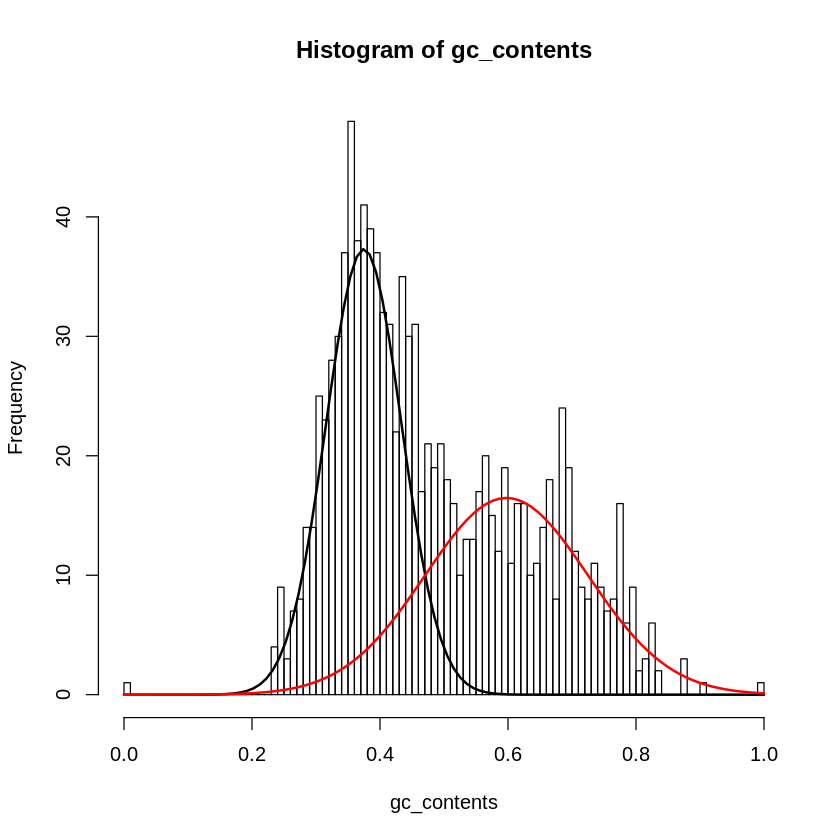

In [44]:
### Insert Your Code Here ###




*[Insert Your Response Here]*

**Question 3.7 [3 points]**: The `normalmixEM()` function in the `mixtools` package implements the EM algorithm for mixtures of normal distributions. Run this function on our G/C content dataset with 2 components. How does its final log likelihood compare to the one produced by your algorithm?  How do the normal distribution means compare between the two implementation or to our true means calculated in the previous problem?  How many incorrectly labelled samples are produced using the posterior probabilities found with mixtools?

In [45]:
### Insert Your Code Here ###




mixtools package, version 1.1.0, Released 2017-03-10
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.



number of iterations= 92 


[1] 654.8003

[1] 0.5964773 0.3743667

                region_label
predicted_labels 3prime 5prime
               1     41    434
               2    496    107

*[Insert Your Response Here]*

That is the last we will use the UTR data.  For those who are curious, one reason for the difference between 3' and 5' UTR in terms of G/C content is that [3' prime UTRs](https://en.wikipedia.org/wiki/Three_prime_untranslated_region) which are at the end of transcribed mRNAs are enriched in adenine rich sequences that play a role in the stability of the mRNA molecule.

### Problem 4: Finding Breast Cancer Subtypes with GMMs (25 points)
In this problem, we are going to examine gene expression values from over 1000 breast cancer tumors.  This data was collected in a massive collaborative project called The Cancer Genome Atlas ([TCGA](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga)).    The TCGA project covers dozens of cancer types, we in this problem we are going to focus on breast invasive carcinomas ([TCGA-BRCA](https://portal.gdc.cancer.gov/projects/TCGA-BRCA)).   We downloaded gene expression data from the UCSC [Xena](https://xenabrowser.net/datapages/?cohort=GDC%20TCGA%20Breast%20Cancer%20(BRCA)) Cancer Genome Browser. This expression data is RNA-seq read counts for all of the genes expressed in our tumor samples. 

Finding genomic subtypes of cancer can be informative for diagnosis, prognosis, and treatment of patients. One well known way to subtype breast cancer tumor samples into one possible genomic subtypes is the [PAM50](https://ascopubs.org/doi/full/10.1200/JCO.2008.18.1370](https://ascopubs.org/doi/full/10.1200/JCO.2008.18.1370) method.  In this approach, the researchers focus on the gene expression of only 50 genes to categorize breast cancers into one of four types: luminal A, luminal B, HER2-enriched, and basal-like.  We will modify our code for EM estimation of GMMs to attempt to reproduce the subtypes from this study using current data from the TCGA.

We have already extracted the expression of the fifty PAM50 genes in the file that accompanies this lab, `TCGA-BRCA.htseq_counts.pam50.txt`.  To read in this data, we will use `read.delim()`. We check the number of rows (genes) and columns (tumors samples).  Finally, we preview a small section of the matrix.

In [46]:
expr_file <- "TCGA-BRCA.htseq_counts.pam50.txt"
BRCA_expr_raw <- as.matrix(read.delim(expr_file, row.names = 1))
dim(BRCA_expr_raw)
BRCA_expr_raw[1:5, 1:5]

[1]   50 1217

,TCGA.3C.AAAU.01A,TCGA.3C.AALI.01A,TCGA.3C.AALJ.01A,TCGA.3C.AALK.01A,TCGA.4H.AAAK.01A
ENSG00000011426.9,11.336507,11.622509,9.569856,10.732167,9.873444
ENSG00000054598.6,5.954196,6.794416,7.569856,9.438792,8.546894
ENSG00000062038.12,8.573647,10.620220,8.640245,11.328114,10.515700
ENSG00000077152.8,9.970106,10.965063,9.791163,9.924813,9.000000
ENSG00000080986.11,10.151017,9.301496,9.199672,8.894818,8.813781


We have downloaded some tumor sample clinical annotation data for our specific cancer subtype, `BRCA`.  This  clinical information for the TCGA-BRCA tumor samples as gathered in a recent comprehensive [study](https://www.sciencedirect.com/science/article/pii/S1535610818301193?via%3Dihub). We can list the 24 annotation fields available in the dataset for 1087 patients.

In [60]:
#library(TCGAbiolinks)
#dataSubt <- TCGAquery_subtype(tumor = "BRCA")
clinical_file <- "TCGA-BRCA.clinical.txt"
clinical_data <- read.delim(clinical_file, header=T)
dim(clinical_data)
colnames(clinical_data)

[1] 1087   24

[1] "patient"                             "Tumor.Type"                         
 [3] "Included_in_previous_marker_papers"  "vital_status"                       
 [5] "days_to_birth"                       "days_to_death"                      
 [7] "days_to_last_followup"               "age_at_initial_pathologic_diagnosis"
 [9] "pathologic_stage"                    "Tumor_Grade"                        
[11] "BRCA_Pathology"                      "BRCA_Subtype_PAM50"                 
[13] "MSI_status"                          "HPV_Status"                         
[15] "tobacco_smoking_history"             "CNV.Clusters"                       
[17] "Mutation.Clusters"                   "DNA.Methylation.Clusters"           
[19] "mRNA.Clusters"                       "miRNA.Clusters"                     
[21] "lncRNA.Clusters"                     "Protein.Clusters"                   
[23] "PARADIGM.Clusters"                   "Pan.Gyn.Clusters"

We will use the `BRCA_Subtype_PAM50` annotation as our true hidden labels this problem.  We extract them as a named vector and summarize the contents.

In [48]:
pam50labels <- clinical_data$BRCA_Subtype_PAM50
names(pam50labels) <- clinical_data$patient
table(pam50labels)

pam50labels
 Basal   Her2   LumA   LumB Normal 
   192     82    562    209     40 

One issue we have is that the tumor sample names in the gene expression matrix do not exactly match the `patient` names in the annotations.  We will fix this by modifying the gene expression matrix column names to match the format of the patient ids by substituting `.` for `-` and taking only the first 12 characters. We will also create a vector of the 1080 patient ids that are both in our annotation and expression matrices.

In [49]:
colnames(BRCA_expr_raw) <- substr(gsub(pattern = "\\.", replacement = "-",
                                       x = colnames(BRCA_expr_raw)),
                                  start = 1, stop = 12)
keep_patients <- intersect(clinical_data$patient, colnames(BRCA_expr_raw))
length(keep_patients )

[1] 1080

Finally, the matrix we want to send to our modified EM algorithm needs to be an N by D matrix.  So we will select only the patients we have annotations for and transpose the expression matrix.

In [50]:
BRCA_expr_final <- t(BRCA_expr_raw[, keep_patients])
dim(BRCA_expr_final)

[1] 1080   50

This final 1080 samples by 50 gene features matrix is the one we want to send to our `expect_maxim_multiD()` algorithm to find if the samples come from different gene expression distributions.

**Question 4.1 [12 points]**: In this question, we are going to created modified versions of our four functions from the previous problem that are able to handle multi-dimensional sample data.  Complete the four functions below, `estimate_component_parameters_multiD `, `e.step_multiD`, `e.step_multiD`, `expect_maxim_multiD` so they will be able to process our `BRCA_expr_final` dataset.  To check that your functions are working, finish each with a check that it is producing a similar output as in problem 3 on the matrix version of gc_contents, `as.matrix(gc_contents)`.  In this formulation of our GMMs, we will assume that each dimension (gene) is independent of all others so while we will need to track the variance of each dimension separately ($\Sigma_{i,i} = \sigma_i ^2$), we do not need to calculate the covariances between different dimensions (we assume $\Sigma_{i,j} = 0$ when $i \neq j$). 

In [51]:
#' Estimate Component Parameters
#'
#' Estimate the parameter values of a component given the data and the
#' current sample assignments
#'
#' @param label, integer value of the component (between 1 and K)
#' @param data, An NxD length vector containing the values for each sample
#' @param current_assignment, An N length vector containing the component each 
#' sample is assigned to
#' @return List containing the mean, stdev, and mix coefficient for the given component
estimate_component_parameters_multiD <- function(label, data,
                                                 current_assignment){
  ### Insert Your Code Here ###  
  # Possibly helpful: if you use the 'drop = FALSE' argument while indexing
  # it keeps the result as a 1D matrix rather than converting to a vector
    
    
  return(list(mean = , stdev = , mix = )) ### Insert Your Code Here ###
}

estimate_component_parameters_multiD(1, as.matrix(gc_contents), cluster_assign)
estimate_component_parameters(1, gc_contents, cluster_assign)

$mean
[1] 0.3895263

$stdev
[1] 0.06790785

$mix
[1] 0.6530612

$mean
[1] 0.3895263

$stdev
[1] 0.06790785

$mix
[1] 0.6530612

In [52]:
#' Expectation Step of the EM Algorithm
#'
#' Calculate the posterior probabilities (soft labels) that each data point has
#' to each component. Also return the total log likelihood of the data given the parameters
#'
#' @param data, An NxD length vector containing the values for each sample
#' @param params List containing the mean, stdev, and mix coefficient for each of K components
#' @return Named list containing the posteriors probability matrix and the total loglike
e.step_multiD <- function(data, params){

  ### Insert Your Code Here ###  
    
  # Suggested steps:
  # Calculate N by K product matrix of \pi_k\mathcal{N}(x_n|\mu_{k},\sigma_{k}^{2}) 
  #   using component estimated parameters and dmvnorm
  # Note: unlike dnorm with used the standard deviation, dmvnorm uses the 
  #   sigma covariance matrix whose diagonal elements are the variances (diag() function may help)
  # Calculate the likelihood per sample  
  # Convert product matrix to posterior probability matrix
  # Convert likelihood per sample to total log likelihood 
    
  return(list(posteriors = ### Insert Your Code Here ### 
              , loglike = ### Insert Your Code Here ### 
              ))
}

e_step_outs <- e.step(gc_contents, params)
e_step_outs$loglike

e_step_outs2 <- e.step_multiD(as.matrix(gc_contents), params)
e_step_outs2$loglike

[1] 642.902

[1] 642.902

In [53]:
#' Maximization Step of the EM Algorithm
#'
#' Update the estimated parameter values for a specified component
#'
#' @param component Component integer to return new params.
#' @param posterior_probs N by K posterior probability matrix
#' @param data, An N by D matrix containing the values for each sample
#' @return Named list containing the mean , stdev, and mix coefficients for the given component.
m.step_multiD <- function(component, posterior_probs, data){

  ### Insert Your Code Here ###  

  return(list(mean = , stdev = , mix = ))   ### Insert Your Code Here ###  
}

m.step(1, posterior_probs = e_step_outs$posteriors, data = gc_contents)

m.step_multiD(1, posterior_probs = e_step_outs$posteriors,
              data = as.matrix(gc_contents))

$mean
[1] 0.390767

$stdev
[1] 0.07086193

$mix
[1] 0.6497016

$mean
[1] 0.390767

$stdev
[1] 0.07086193

$mix
[1] 0.6497016

In [54]:
#' Expectation Maximization Algorithm
#'
#' Calculate the posterior probabilities (soft labels) that each data point has
#' to each component. Also return the total log likelihood of the data given the parameters
#'
#' @param data, An N length vector containing the values for each sample
#' @param params List containing the mean, stdev, and mix coefficient for each component
#' @return Named list containing the posteriors probability matrix and the total loglike
expect_maxim_multiD <- function(data, num_components=2, max_iterations=100,
                                converge_crit=0.001){
  set.seed(1)
  ### Insert Your Code Here ###

 
  return(list(iteration = ### Insert Your Code Here ###
              , loglike = ### Insert Your Code Here ###
              , posteriors = ### Insert Your Code Here ###
              , params = ### Insert Your Code Here ###
              ))
}

EMresults2 <- expect_maxim(gc_contents, 2, 100, 0.001)
EMresults2$loglike

EMresults <- expect_maxim_multiD(as.matrix(gc_contents), 2, 100, 0.001)
EMresults$loglike

[1] 654.7946

[1] 654.7946

**Question 4.2 [5 points]**:  Run your new function `expect_maxim_multiD()` with our `BRCA_expr_final` gene expression matrix as the data.  Look for 4 clusters.  How many iterations does it take to converge?  What is the final loglikehood of the data given the learned model parameters?  

In [55]:
### Insert Your Code Here ###



[1] 52

[1] -85758.88

*[Insert Your Response Here]*

**Question 4.3 [2 points]**: Using the posterior probabilities, map each tumor to its most probable component?  Compare these assignments to the "true" PAM50 subtypes (`pam50labels`) on the same samples.  Does any of your components clearly map to one of the PAM50 subtypes?  How many samples is your method misclassifying?

In [56]:
### Insert Your Code Here ###



        predicted_labels
           1   2   3   4
  Basal    1 189   0   0
  Her2    76   4   1   1
  LumA    83   0 177 301
  LumB   177   0   3  27
  Normal   3   6  23   8

*[Insert Your Response Here]*

**Question 4.4 [2 points]**: The `Mclust()` function in the `mclust` package is able to cluster data samples using estimated GMMs.  Run the `Mclust` algorithm on our `BRCA_expr_final` dataset.  Use `G=4` clusters and modelNames="VVI" which has similar [assumptions]([https://journal.r-project.org/archive/2016/RJ-2016-021/RJ-2016-021.pdf](https://journal.r-project.org/archive/2016/RJ-2016-021/RJ-2016-021.pdf)) about the parameters of the GMM to our implementation.  How does the final log likelihood of the `Mclust` result compare to the one from your implementation?

In [57]:
### Insert Your Code Here ###



Package 'mclust' version 5.4.3
Type 'citation("mclust")' for citing this R package in publications.


[1] -85759.96

*[Insert Your Response Here]*

**Question 4.5 [2 points]**: Does there seem to be a correspondence between the `Mclust` clusters and  PAM50 subtypes?  How many samples does the method method misclassify? How does this compare to your implementation?

In [58]:
### Insert Your Code Here ###



        
           1   2   3   4
  Basal    1   0 189   0
  Her2    76   1   4   1
  LumA    80 179   0 302
  LumB   175   3   0  29
  Normal   3  23   6   8

*[Insert Your Response Here]*


Finally, in the runs so far we have assumed we have known the appropriate number of components and assumptions about the GMMs.  However, there may be other settings which outperform our results.  One way to compare among different models with different numbers of parameters is to use the Bayesian Information Criterion ([BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion)). This statistic captures the quality of a model and its complexity using the log likelihood $ln(\hat{L})$, the number of samples $n$, and the number of parameters being estimated in the model $q$, such that the $BIC = q\times ln(n)  - 2ln(\hat{L})$. 

We can run the `Mclust` algorithm again without specifiying the number of clusters `G` or the model types `modelNames`.  This will take a several minutes to complete.  Uncomment the following line and run the next cell, when it is finished, we can plot the BIC for different values of k and different model assumptions.

In [59]:
# mclust_search <- Mclust(data = BRCA_expr_final) ### uncomment this line
plot(mclust_search, what = "BIC")

ERROR: Error in plot(mclust_search, what = "BIC"): object 'mclust_search' not found


**Question 4.6 [2 points]**: According to the BIC plot which attempts to trade off model complexity vs fit quality, how many components would best model our data?  Why? Which type of model (modelNames) is best suited for clustering this BRCA dataset? Why? What are the constraints on the parameters of that model? What are some weaknesses with our approach of modeling RNA-seq read counts as coming from a mixture of Gaussian distributions?

*[Insert Your Response Here]*

### Bonus Problem 5: Extensions to EM Algorithm (20 bonus points)

**Question 5.1 [4 points]**: We compared our GMM based clustering of `BRCA_expr_final` to the PAM50 subtypes, but perhaps our final clusterings relate to some of the other clinical phenotypes provided in the `dataSubt` such as `pathologic_stage`, `BRCA_Pathology`, or `Pan-Gyn Clusters`.  How does your favorite clustering of `BRCA_expr_final` compare to these alternate phenotypes? How would you quantify these comparisons since each may have a different number of classes (show your code)? Which phenotype seems to most related to the clustering of the expression data?

In [ ]:
### Insert Your Code Here ###

*[Insert Your Response Here]*

**Question 5.2 [8 points]**:  We chose to assume that each gene feature was independent and therefore did not have to estimate or store any parameters for the off diagonal elements of the covariance matrices for our Gaussian distributions. This is a poor assumption in practice because gene expression can be correlated if genes share similar regulatory mechanisms. If you loosen this assumption, how does that change our EM function above (show your revised functions)? What model in the MClust modelNames is your new implementation closest to? Why?

In [ ]:
### Insert Your Code Here ###

*[Insert Your Response Here]*

**Question 5.3 [8 points]**: Another type of TCGA data is somatic mutation data. We have extracted the 273 most varying genes for these TCGA-BRCA patients and put the data in `mutfile="TCGA-BRCA.somatic_mutations.top273.txt"`. This is again a genes by samples matrix, but this time the values of the matrix are either (1) meaning that there is a non-silent (causes change to translated amino acid) somatic mutation in the protein coding sequence of the gene or (0) meaning there was not a mutation of this type. If we were to model the mutation data of our BRCA samples as a mixture of models, we would use Bernoulli distributions rather than Gaussians. Write the functions that use EM to fit a mixture of multivariate Bernoulli distributions (the supplementary reading material from lecture 2 covers this in Section 9.3.3).  Apply your algorithm to find 4 clusters in the mutation dataset.  How do these clusters compare to the Gaussian mixture model clusters that we produce on the PAM50 gene expression data `BRCA_final_expr`?

In [ ]:
### Insert Your Code Here ###

*[Insert Your Response Here]*

## And this concludes Lab 3.2! 